# Project no 4

In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load data
data=pd.read_csv("TATAGLOBAL.csv")

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2095,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98
2096,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2097,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2098,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2099,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56


In [17]:
#sort with date
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [18]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2099,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2098,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2097,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2096,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2095,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [19]:
df.reset_index(inplace=True)

In [20]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2099,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
1,2098,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2,2097,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
3,2096,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
4,2095,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


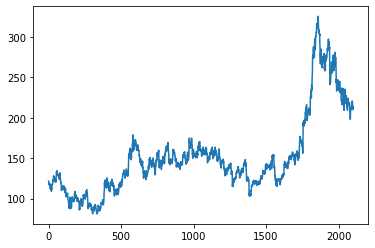

In [23]:
plt.plot(df['Close'])

In [24]:
df1=df['Close']

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.54595588],
       [0.52736928],
       [0.54268791]])

In [27]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(1470, 630)

In [45]:
def create_dataset(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
        return np.array(dataX), np.array(dataY)

In [46]:
time_step=100
x_train, y_train= create_dataset(train_data, time_step)
x_test, ytest = create_dataset(test_data, time_step)

In [47]:
print(x_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [48]:
print(x_test.shape), print(ytest.shape)

(1, 100)
(1,)


(None, None)

In [49]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test =x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [65]:
pip install tensorflow


  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.14.0-py3-none-any.whl (131 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached grpcio-1.41.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [74]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_spuared_error', optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [94]:
test_predict=model.predict(x_test)

In [95]:
test_predict1=scaler.inverse_transform(test_predict)

In [99]:
test_predict1

array([[0.00626483]], dtype=float32)

In [105]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

0.1475341877370488